## Pre-Processing - (continued) / Modeling ##

Notebook to finish pre-processing and model the data from my EDA notebook

**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import ElasticNet, LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

**Pre-processing (continued)**

In [3]:
train = pd.read_csv('clean_train.csv')

In [4]:
test = pd.read_csv('clean_test.csv')

The column drops and below were created after running my previous data through a LASSO model, identifying the columns that had 0 coeeficients and dropping those

In [5]:
train.drop(['Garage Cars','Sale Type_CWD','TotRms AbvGrd','Functional_Sev','Sale Type_WD ','Mo Sold_Aug','Neighborhood_NPkVill',\
           'Functional_Min2','Mo Sold_Dec','House Style_SLvl','Neighborhood_NAmes','Mo Sold_Nov','House Style_1.5Unf','Neighborhood_Blmngtn',\
           'Bldg Type_Duplex','Neighborhood_BrkSide','Neighborhood_CollgCr','Neighborhood_Landmrk','Neighborhood_Mitchel','Sale Type_VWD'],axis=1,inplace=True)

In [6]:
test.drop(['Garage Cars','Sale Type_CWD','TotRms AbvGrd','Functional_Sev','Sale Type_WD ','Mo Sold_Aug','Neighborhood_NPkVill',\
           'Functional_Min2','Mo Sold_Dec','House Style_SLvl','Neighborhood_NAmes','Mo Sold_Nov','House Style_1.5Unf','Neighborhood_Blmngtn',\
           'Bldg Type_Duplex','Neighborhood_BrkSide','Neighborhood_CollgCr','Neighborhood_Landmrk','Neighborhood_Mitchel','Sale Type_VWD'],axis=1,inplace=True)

In [7]:
train.drop(['Mo Sold_Sep','Sale Type_ConLD','Neighborhood_Blueste','Neighborhood_SWISU','House Style_1Story'],axis=1,inplace=True)

In [8]:
test.drop(['Mo Sold_Sep','Sale Type_ConLD','Neighborhood_Blueste','Neighborhood_SWISU','House Style_1Story'],axis=1,inplace=True)

The interactions below were created after looking at the highest weighted features from a LASSO model of my data and then identifying features from that set that seemed like they may be co-linear

In [9]:
train['SF interaction']=train['SF']*train['Gr Liv Area']
train['overall interaction']=train['Overall Qual']*train['Gr Liv Area']
train['overall garage interaction']=train['Overall Qual']*train['garage interaction']

In [10]:
test['SF interaction']=test['SF']*test['Gr Liv Area']
test['overall interaction']=test['Overall Qual']*test['Gr Liv Area']
test['overall garage interaction']=test['Overall Qual']*test['garage interaction']

**Modeling**

In [11]:
y = train['SalePrice']
features = [name for name in train.columns if name != 'SalePrice']
X = train[features]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
#Scale our data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/yichenh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/yichenh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


**Baseline model**

The baseline model in our case is just the mean value of houses in our train dataset

In [14]:
baseline = y_train.mean()
baseline

181807.08072916666

In [15]:
base_pred = pd.Series(baseline,index=range((y_test).size))

In [16]:
base_pred.head()

0    181807.080729
1    181807.080729
2    181807.080729
3    181807.080729
4    181807.080729
dtype: float64

In [17]:
#R2 score
print(r2_score(y_test, base_pred))

-0.0001862009827229283


In [18]:
#RMSE
np.sqrt(mean_squared_error(y_test,base_pred))

79756.87608366033

**Linear Regression**

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
#R2 scores
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

print(r2_score(y_train, y_pred_lr_train))
print(r2_score(y_test, y_pred_lr_test))

0.8953941504373405
0.9009601653153501


In [22]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred_lr_test))

25097.62692872479

**Ridge Model**

In [23]:
r_alphas = np.logspace(-2, 5, 100)
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_model = ridge_model.fit(X_train, y_train)

In [24]:
ridge_model.alpha_

0.01

This is my lowest possible alpha in my range which means that I'm essentially employing no regularization. I would expect the scores from Ridge to be very similar to my Linear Regression model which they are

In [25]:
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

print(r2_score(y_train, y_pred_train_ridge))
print(r2_score(y_test, y_pred_test_ridge))

0.8953941460940719
0.9009602768136723


In [26]:
np.sqrt(mean_squared_error(y_test,y_pred_test_ridge))

25097.61280135831

**LASSO Model**

In [27]:
lasso = LassoCV(n_alphas=200,cv=10)
lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [28]:
print(lasso.alpha_)

65.35377948965412


In [29]:
lasso.score(X_train,y_train)

0.8950164943703056

In [30]:
lasso.score(X_test,y_test)

0.9017825910389913

In [31]:
lasso_pred = lasso.predict(X_test)

In [32]:
np.sqrt(mean_squared_error(y_test,lasso_pred))

24993.20448384762

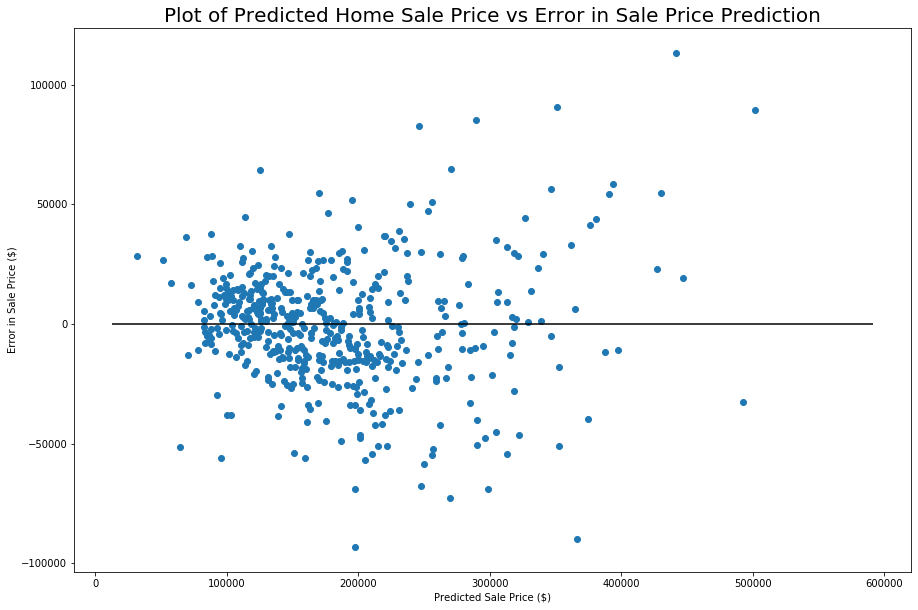

In [33]:
#Create a residual plot

plt.figure(figsize=(15,10))

plt.title('Plot of Predicted Home Sale Price vs Error in Sale Price Prediction', fontsize = 20)
plt.xlabel('Predicted Sale Price ($)', fontsize = 10)
plt.ylabel('Error in Sale Price ($)', fontsize = 10);

plt.hlines(0,y_test.min(),y_test.max())
plt.scatter(lasso_pred,y_test-lasso_pred);

The above residual plot shows some heteroscedasticity so my model could be improved if I had more time

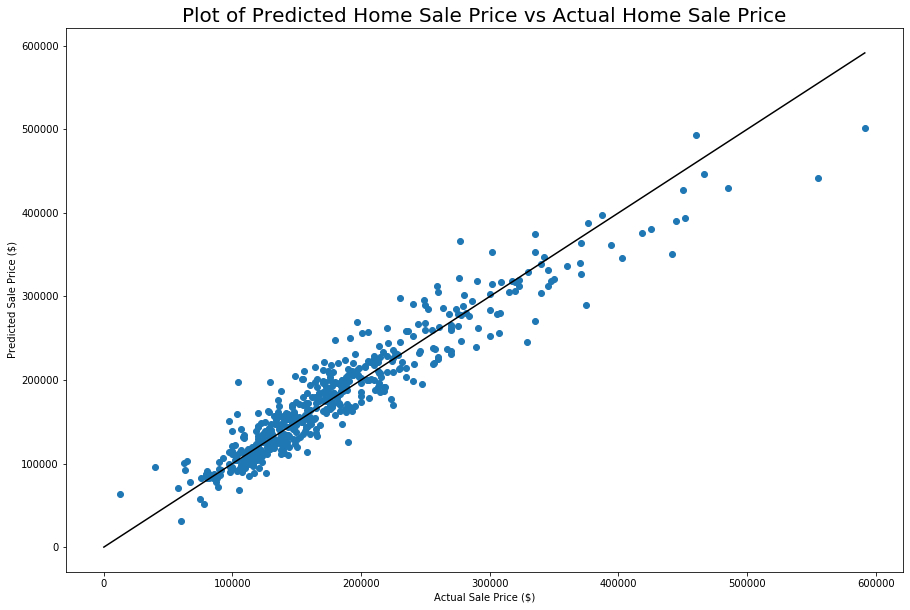

In [34]:
#Create a presentation friendly residual plot
plt.figure(figsize=(15,10))

plt.title('Plot of Predicted Home Sale Price vs Actual Home Sale Price', fontsize = 20)
plt.xlabel('Actual Sale Price ($)', fontsize = 10)
plt.ylabel('Predicted Sale Price ($)', fontsize = 10);

plt.scatter(y_test,lasso_pred)
plt.plot([0, np.max(y_test)], [0, np.max(y_test)], c='k');

The above is my final LASSO run but i used the below code with previous LASSO runs to identify the highest weighted and lowest weighted coeeficients and ended up removing those at the top of this notebook

In [35]:
lasso_coefs = pd.DataFrame({
    'feature_name':X.columns,
    'coefficients':lasso.coef_,
    'abs_coef':np.abs(lasso.coef_)
})

lasso_coefs.sort_values('abs_coef',ascending=False, inplace=True)

In [36]:
lasso_coefs.tail()

,feature_name,coefficients,abs_coef
24,Paved Drive_P,-285.059762,285.059762
33,Mo Sold_Oct,-246.340046,246.340046
47,Neighborhood_Sawyer,-244.434031,244.434031
52,Neighborhood_Veenker,170.087998,170.087998
28,Mo Sold_Jan,59.996886,59.996886


In [37]:
lasso_coefs.head(15)

,feature_name,coefficients,abs_coef
74,SF interaction,-44309.548221,44309.548221
75,overall interaction,41566.895323,41566.895323
14,SF,26766.307836,26766.307836
76,overall garage interaction,25517.423875,25517.423875
17,Exter Qual_TA,-13011.436489,13011.436489
16,Exter Qual_Gd,-12121.681482,12121.681482
5,Gr Liv Area,11245.562049,11245.562049
1,Overall Qual,-11153.259685,11153.259685
11,garage interaction,-9985.181316,9985.181316
6,Kitchen Qual,7546.564807,7546.564807


**Elastic Net / Grid-Searching**

In [38]:
enet = ElasticNet()
enet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
enet_params = {
    'alpha':np.linspace(.2,1,15),
    'l1_ratio': np.linspace(0,1,15)
}

In [40]:
enet_gridsearch = GridSearchCV(
    ElasticNet(),
    enet_params,
    cv=5,
    n_jobs=2,
    return_train_score=False
)

In [41]:
enet_gridsearch.fit(X_train,y_train)

/Users/yichenh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'alpha': array([0.2    , 0.25714, 0.31429, 0.37143, 0.42857, 0.48571, 0.54286,
       0.6    , 0.65714, 0.71429, 0.77143, 0.82857, 0.88571, 0.94286,
       1.     ]), 'l1_ratio': array([0.     , 0.07143, 0.14286, 0.21429, 0.28571, 0.35714, 0.42857,
       0.5    , 0.57143, 0.64286, 0.71429, 0.78571, 0.85714, 0.92857,
       1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [42]:
enet_gridsearch.best_params_

{'alpha': 0.2, 'l1_ratio': 1.0}

l1 ratio of 1 indicates pure LASSO, expecting this to be very close or equivalent to my LASSO score

In [43]:
best_enet = enet_gridsearch.best_estimator_

In [44]:
best_enet.score(X_train, y_train)

0.8953941468429953

In [45]:
best_enet.score(X_test, y_test)

0.9009640620480135

In [46]:
enet_pred = best_enet.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test,enet_pred))

25097.133189488777

**Generate Kaggle Submission**

Kaggle requires the Id column but my model can't take the Id so need to remove this column before I run my predictions

In [48]:
testnoid = test[[name for name in test.columns if name != 'Id']]

Due to a number of my modifications and the order they were done in, my columns are out of order which will cause StandardScaler to misbehave, running the below code to re-order my column to how my training dataset it.

In [49]:
testnoid = testnoid[features]

In [50]:
testnoid_scaled = ss.transform(testnoid)

/Users/yichenh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [51]:
submit_col = lasso.predict(testnoid_scaled)

In [52]:
#time to submit
submit = pd.DataFrame({
    'Id':test['Id'],
    'SalePrice':submit_col
})

In [53]:
submit.head()

,Id,SalePrice
0,2658,128462.111804
1,2718,173696.101172
2,2414,201404.710507
3,1989,103649.549255
4,625,202951.987855


In [54]:
submit.to_csv('final_submission.csv',index=False)

**Analysis / Explanation**

The baseline model has an around 80,000 so we definitely want our model to be better than that. However, our model is predicting home sale prices so errors in the tens of thousands should also be somewhat expected.

My approach on this project was a bit scattershot in that I started with my EDA but half-way through decided I wanted to get some modeling results and ended up guessing on or using many of the columns that I was planning on doing my EDA on. This surprisingly generated a fairly good RMSE score. I then proceeded to finish my EDA and to my suprise, ended up with a worse RMSE score. I then looked back at my first models and identified a number a columns using LASSO that had high correlations that I subsequently eliminated and proceeded to add those back in which lowered my RMSE scores. Finally, I used a LASSO regression to identify higher and zero coefficient features. I removed the zero coefficient features and ended up creating interactions for stronger coefficient features that appeared like they may be co-linear.

The result of removing the zero coefficient features caused my linear regression and Ridge model scores to be essentially the same. This makes sense since those extra coefficients were screwing up my linear regression and without them, I didn't need any regularization on my model. My elastic net regression didn't converge but showed an l1 ratio of 1 indicating pure LASSO. This means that LASSO is purely the best model for my data and not a combination of the two.

The creation of interactions makes the analysis of individual coefficients difficult to do, especially relative to other features. Instead, we can draw conclusions from the process of generating our final model. My initial thought process was to use EDA to identify correlated features and then generate a model with only those features. Through interaction using LASSO though, I realized that many of the features I didn't think had value actually ended up helping my model. I believe the reasoning for this is that features that don't appear predictive of sale price when combined with other features actually become predictive. If I was to re-do this or do this project again, I would try to remove less features prior to running LASSO and then use the results of that first run to remove features and generate interactions to iterate to a better model.